# IMDB - Binary Classification
> ## NLP(Natural Language Processing)

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import TensorFlow

* TensorFlow  Version 확인

In [2]:
import tensorflow as tf

tf.__version__

'2.9.2'

# I. IMDB Data_Set Load & Review

> ## 1) Load IMDB Data_Set

In [3]:
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


> ## 2) Original Data Shape

In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000,) (25000,) (25000,) (25000,)


> ## 3) Visualization & Frequency

> ### (1) X_train - 리뷰 길이

In [5]:
import matplotlib.pyplot as plt

print('리뷰 최대 길이 :', max(len(L) for L in X_train))
print('리뷰 평균 길이 :', sum(map(len, X_train))/len(X_train))

리뷰 최대 길이 : 2494
리뷰 평균 길이 : 238.71364


> ### (2) X_train 문장 길이 시각화

* 10개 문장 길이 확인
 - <font color = 'red'>리뷰 길이가 서로 다름

In [6]:
import pandas as pd

DF = pd.DataFrame({'Length':(len(L) for L in X_train[0:10])})

* 막대 그래프

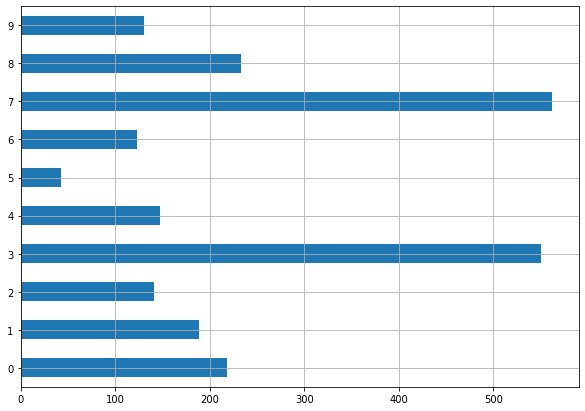

In [7]:
plt.figure(figsize = (10, 7))
DF['Length'].plot(kind = 'barh', 
                  grid = True)
plt.show()

> ### (3) y_train - Frequency(0:부정, 1:긍정)

In [8]:
import numpy as np

unique_elements, counts_elements = np.unique(y_train, return_counts = True)

print('Label 빈도수:')
print(np.asarray((unique_elements, counts_elements)))

Label 빈도수:
[[    0     1]
 [12500 12500]]


# II. Keras - pad_sequences( )

> ## 1) X_train & X_test: (25000, 2500)

* pad_sequences( )
 - padding = 'pre': 문장의 길이를 2500으로 변경하고 앞쪽에 '0'으로 채우기
 - padding = 'post': 문장의 길이를 2500으로 변경하고 뒤쪽에 '0'으로 채우기

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, 
                        maxlen = 2500, 
                        padding = 'post')
X_test = pad_sequences(X_test, 
                       maxlen = 2500, 
                       padding = 'post')

* 처리결과 확인

In [10]:
print(X_train[0][:10])
print(X_train[0][-10:])

[   1   14   22   16   43  530  973 1622 1385   65]
[0 0 0 0 0 0 0 0 0 0]


* Transformation Check

In [11]:
DF2 = pd.DataFrame({'Length':(len(L) for L in X_train[0:10])})

* 막대 그래프

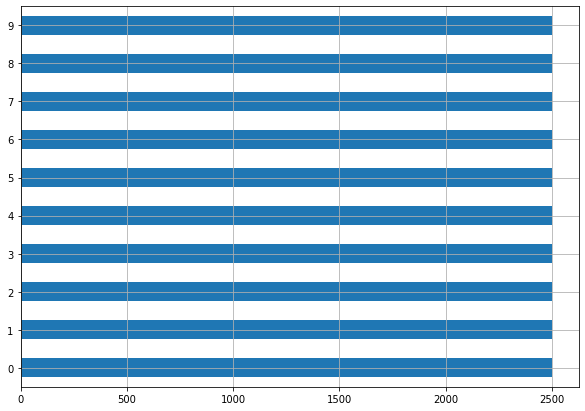

In [12]:
plt.figure(figsize = (10, 7))
DF2['Length'].plot(kind = 'barh', 
                   grid = True)
plt.show()

> ## 2) Transformed Data Shape

In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(25000, 2500) (25000,) (25000, 2500) (25000,)


# III. IMDB Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

imdb = models.Sequential()
imdb.add(layers.Dense(16, activation = 'relu', input_shape = (2500,)))
imdb.add(layers.Dense(16, activation = 'relu'))
imdb.add(layers.Dense(1, activation = 'sigmoid'))

* 모델 구조 확인

In [15]:
imdb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                40016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 40,305
Trainable params: 40,305
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [16]:
imdb.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

> ## 3) Model Fit

* 약 2분

In [17]:
%%time

Hist_imdb = imdb.fit(X_train, y_train,
                     epochs = 50,
                     batch_size = 512,
                     validation_data = (X_test, y_test))

Epoch 1/50
49/49 [==============================] - 5s 48ms/step - loss: 8.1671 - accuracy: 0.5015 - val_loss: 1.0141 - val_accuracy: 0.4987
Epoch 2/50
49/49 [==============================] - 2s 36ms/step - loss: 0.7936 - accuracy: 0.5050 - val_loss: 0.7315 - val_accuracy: 0.5004
Epoch 3/50
49/49 [==============================] - 1s 18ms/step - loss: 0.7065 - accuracy: 0.5022 - val_loss: 0.7188 - val_accuracy: 0.5001
Epoch 4/50
49/49 [==============================] - 1s 19ms/step - loss: 0.6965 - accuracy: 0.5035 - val_loss: 0.7068 - val_accuracy: 0.4997
Epoch 5/50
49/49 [==============================] - 1s 18ms/step - loss: 0.6922 - accuracy: 0.5045 - val_loss: 0.7066 - val_accuracy: 0.5000
Epoch 6/50
49/49 [==============================] - 1s 18ms/step - loss: 0.6918 - accuracy: 0.5052 - val_loss: 0.7066 - val_accuracy: 0.5011
Epoch 7/50
49/49 [==============================] - 1s 19ms/step - loss: 0.6909 - accuracy: 0.5068 - val_loss: 0.7221 - val_accuracy: 0.5006
Epoch 8/50
49

> ## 4) 학습 결과 시각화

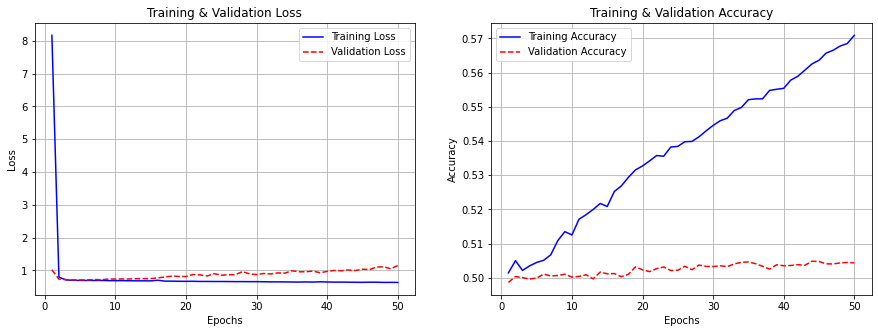

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_imdb.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_imdb.history['loss'], 'b-')
plt.plot(epochs, Hist_imdb.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_imdb.history['accuracy'], 'b-')
plt.plot(epochs, Hist_imdb.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [19]:
loss, accuracy = imdb.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

782/782 [==============================] - 2s 2ms/step - loss: 1.1456 - accuracy: 0.5044
Loss = 1.14562
Accuracy = 0.50440


> ## 6) Model Predict

In [20]:
np.round(imdb.predict(X_test, verbose = 0))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

# 
# 
# 
# The End
# 
# 
# 